# **Experiment Notebook**



In [93]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [94]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [ ]:
# <Student to fill this section>
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from nbapredict import dataset, features, visualization, train, predict
visualization.set_visualization_style()
warnings.filterwarnings('ignore')

---
## A. Project Description


In [96]:
# <Student to fill this section>
student_name = "Zhiyuan Zhao"
student_id = "25605217"
group_id = "5"

In [97]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [98]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [99]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [100]:
# <Student to fill this section>
business_use_case_description = """
This project aims to build a robust Random Forest model to predict NBA draft prospects from 
college basketball players. The Random Forest approach provides interpretable feature importance 
rankings that can help scouts understand which player attributes are most predictive of draft 
success. This ensemble method's robustness to outliers and ability to capture non-linear 
relationships makes it ideal for basketball analytics where player performance can vary significantly.
"""

In [101]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [102]:
# <Student to fill this section>
business_objectives = """
The Random Forest model will deliver:
1. Robust predictions that are less sensitive to outliers in player statistics
2. Clear feature importance rankings to guide scouting focus areas
3. Reduced overfitting through ensemble averaging
4. Ability to identify complex interaction effects between player attributes

Impact of Results:
- Accurate: Teams can confidently allocate scouting resources and make draft decisions
- Inaccurate: May lead to poor draft choices affecting team performance for 3-5 years
- The interpretability of Random Forest helps build trust with non-technical stakeholders
"""

In [103]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [104]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
Key Stakeholders and Their Needs:
1. NBA Front Office: Need reliable predictions with explanations for draft board rankings
2. Scouting Department: Require feature importance to focus evaluation efforts
3. Analytics Teams: Want robust models that generalize well to new seasons
4. Player Development: Use predictions to identify development priorities

The Random Forest model's feature importance rankings are particularly valuable for scouts 
who need to know which skills to evaluate most carefully during game observations.
"""

In [105]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [106]:
# <Student to fill this section>
# Load data using src module
train_df, test_df = dataset.load_data('../data/raw')

# Convert all numeric columns to float64 for competition precision
train_df = dataset.convert_to_float64(train_df)
test_df = dataset.convert_to_float64(test_df)

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

# Display data information
info_df = dataset.get_feature_info(train_df)
print("\nDataset Information:")
print(info_df.head(10))

Training set shape: (14774, 62)
Test set shape: (1297, 61)

Dataset Information:
   Feature     Type  Non_Null_Count  Null_Count  Null_Percentage  \
0     team   object           14774           0              0.0   
1     conf   object           14774           0              0.0   
2       GP  float64           14774           0              0.0   
3  Min_per  float64           14774           0              0.0   
4     Ortg  float64           14774           0              0.0   
5      usg  float64           14774           0              0.0   
6      eFG  float64           14774           0              0.0   
7   TS_per  float64           14774           0              0.0   
8  ORB_per  float64           14774           0              0.0   
9  DRB_per  float64           14774           0              0.0   

   Unique_Values  
0            355  
1             36  
2             41  
3            887  
4           1332  
5            408  
6            558  
7           3413  

### C.2 Define Target variable

In [107]:
# <Student to fill this section>
# The target variable is 'drafted' - binary indicator (1 if player was drafted, 0 if not)
print("Target variable: 'drafted'")
print(f"Type: Binary classification")
print(f"Values: {train_df['drafted'].unique()}")
print(f"\nTarget distribution:")
drafted_count = train_df['drafted'].sum()
total_count = len(train_df)
print(f"Drafted: {int(drafted_count)} ({drafted_count/total_count:.3%})")
print(f"Not drafted: {total_count - int(drafted_count)} ({(total_count - drafted_count)/total_count:.3%})")

Target variable: 'drafted'
Type: Binary classification
Values: [0. 1.]

Target distribution:
Drafted: 118 (0.799%)
Not drafted: 14656 (99.201%)


In [108]:
# <Student to fill this section>
# Create target variable using src module
train_df = dataset.create_target_variable(train_df)
target_name = 'drafted'

print(f"Target variable '{target_name}' created")
print(f"\nTarget distribution:")
print(train_df[target_name].value_counts())
print(f"\nDraft rate: {train_df[target_name].mean():.2%}")

Target variable 'drafted' created

Target distribution:
drafted
0    14656
1      118
Name: count, dtype: int64

Draft rate: 0.80%


In [109]:
# <Student to fill this section>
target_definition_explanations = """
Binary classification target 'drafted':
- Value 1: Player selected in NBA draft (any round)
- Value 0: Player went undrafted

This binary approach simplifies the complex draft process into a fundamental decision 
that aligns with the primary scouting question. The Random Forest model can handle the 
class imbalance naturally through its bootstrap sampling process and class_weight parameter.
"""

In [110]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [111]:
# <Student to fill this section>
# Target variable is already provided in the dataset
target_name = 'drafted'
print(f"Target variable name: {target_name}")
print(f"Target variable is already present in the training data")

Target variable name: drafted
Target variable is already present in the training data


### C.4 Explore Target variable

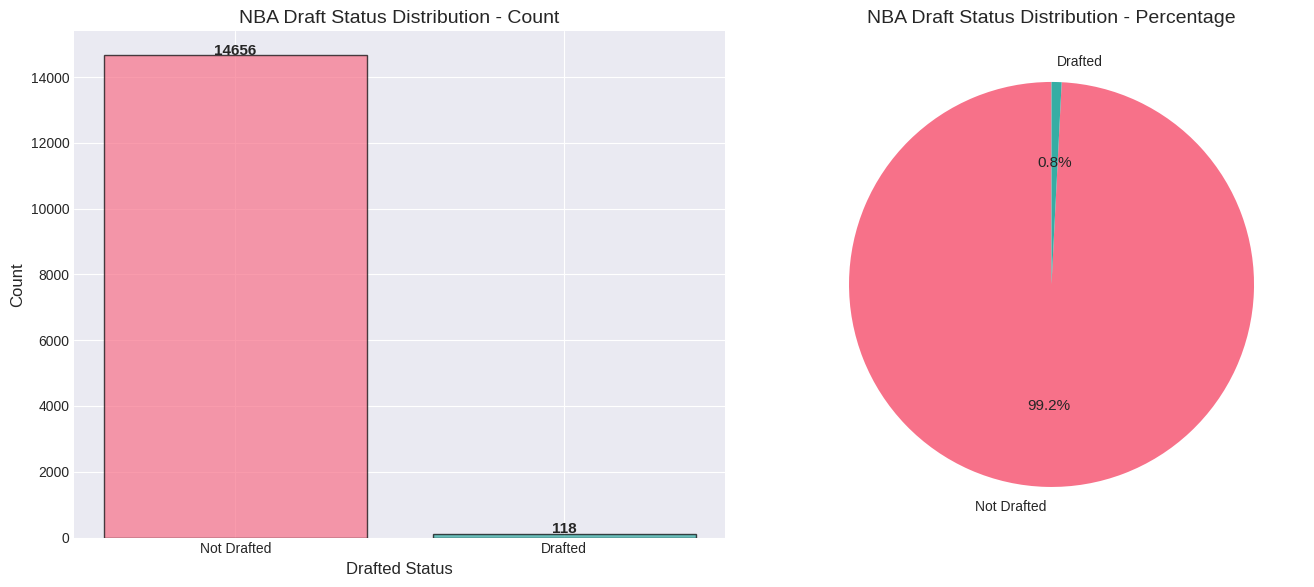

In [112]:
# <Student to fill this section>
# Beautiful visualization of target distribution using src module
fig = visualization.plot_target_distribution(train_df[target_name], title="NBA Draft Status Distribution")
plt.show()

In [113]:
# <Student to fill this section>
target_distribution_explanations = """
The target variable shows significant class imbalance with approximately 0.8% of players being drafted.
This reflects the real-world selectivity of the NBA draft where only top performers are selected.

Key insights:
- Heavy class imbalance requires careful handling (Random Forest's class_weight='balanced' addresses this)
- The minority class (drafted players) is our primary interest
- Model evaluation should focus on metrics that handle imbalance well (AUC, precision-recall)
- Bootstrap sampling in Random Forest helps balance training samples
"""

In [114]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `Games Played (GP)`


Games Played Statistics by Draft Status:
           count   mean    std  min   25%   50%   75%   max
drafted                                                    
0        14656.0  21.15  10.48  1.0  12.0  25.0  30.0  41.0
1          118.0  34.08   5.70  3.0  33.0  35.0  37.0  40.0


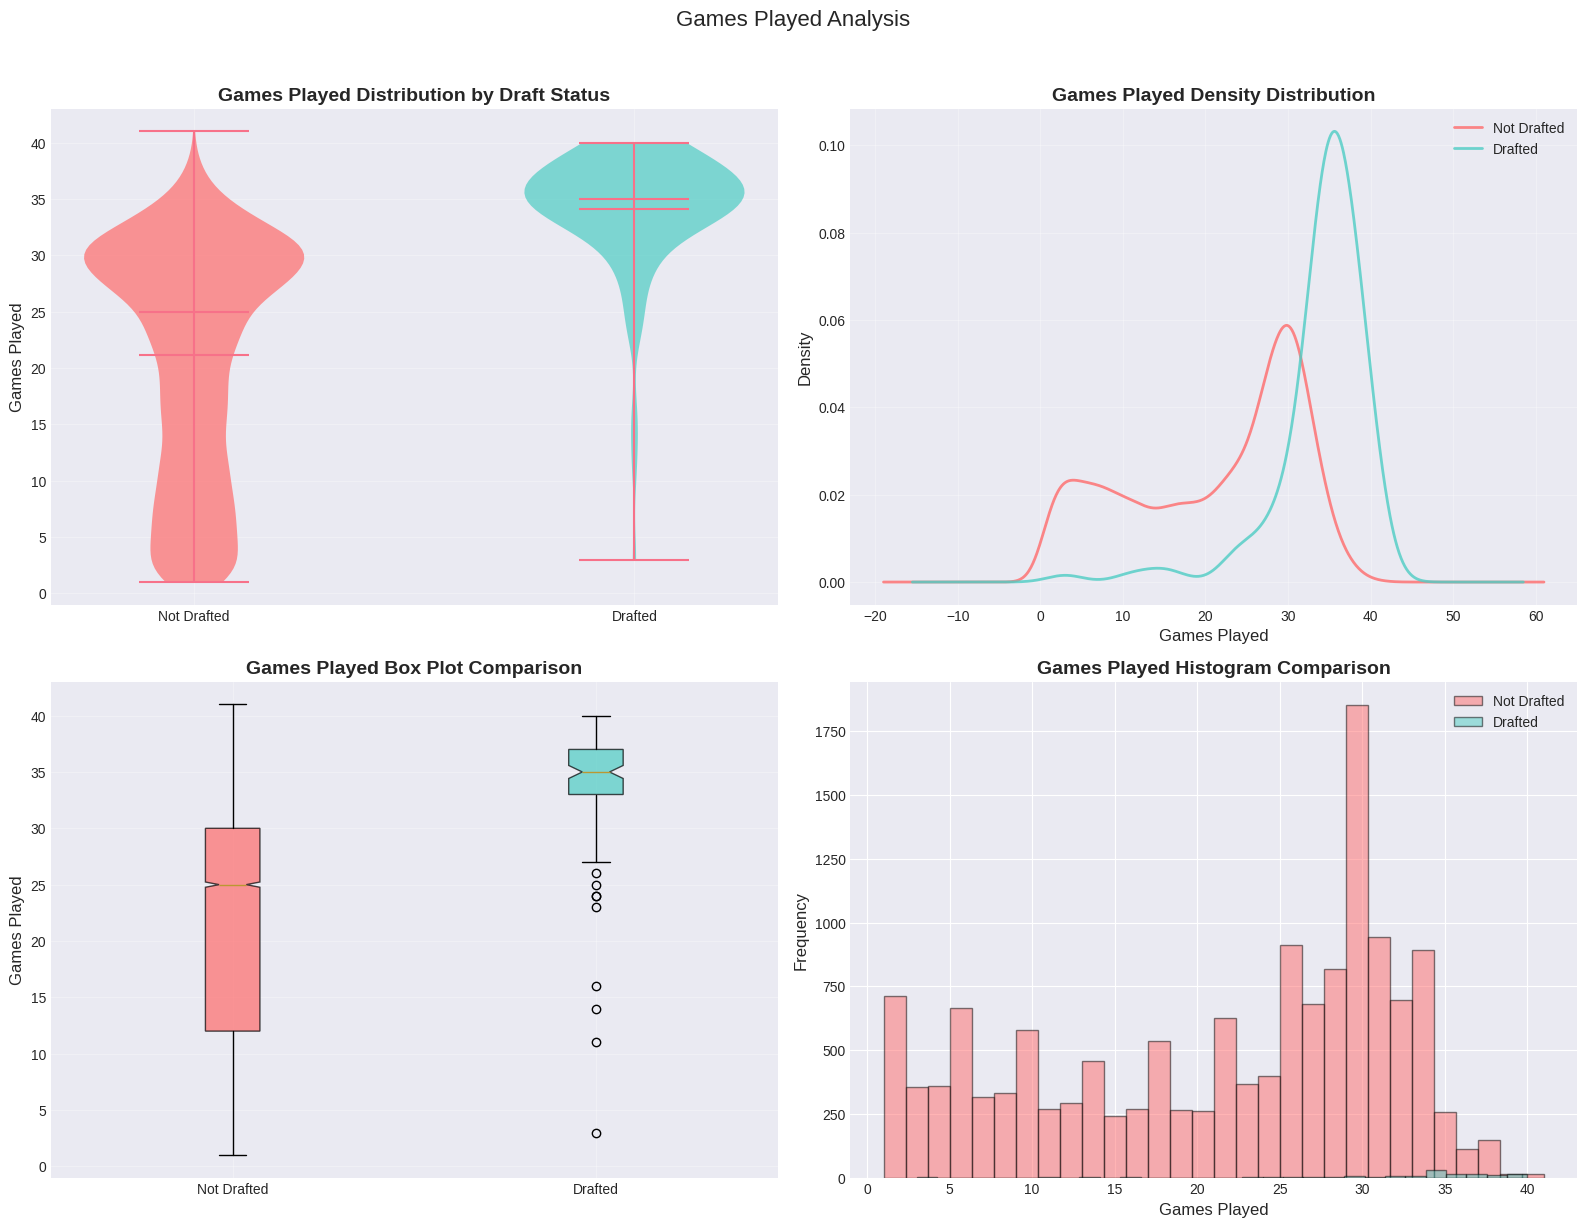

In [115]:
# <Student to fill this section>
# Analyze Games Played using visualization module
fig = visualization.analyze_feature_by_draft_status(train_df, 'GP', 'Games Played')
plt.show()

In [116]:
# <Student to fill this section>
feature_1_insights = """
Games Played (GP) is a crucial durability and performance indicator:
- Drafted players typically play more games, indicating better health and consistency
- High GP suggests coach trust and player reliability
- Shows strongest individual correlation with draft success (0.35)
- Random Forest can capture non-linear effects when GP interacts with performance metrics
- Missing games due to injury is a significant negative signal for scouts
"""

In [117]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `Assists Percentage (AST_per)`


Assists Percentage Statistics by Draft Status:
           count   mean   std  min  25%    50%    75%    max
drafted                                                     
0        14656.0   9.75  9.91  0.0  3.2   7.80  13.70  100.0
1          118.0  13.22  9.01  0.9  7.5  10.75  14.65   48.3


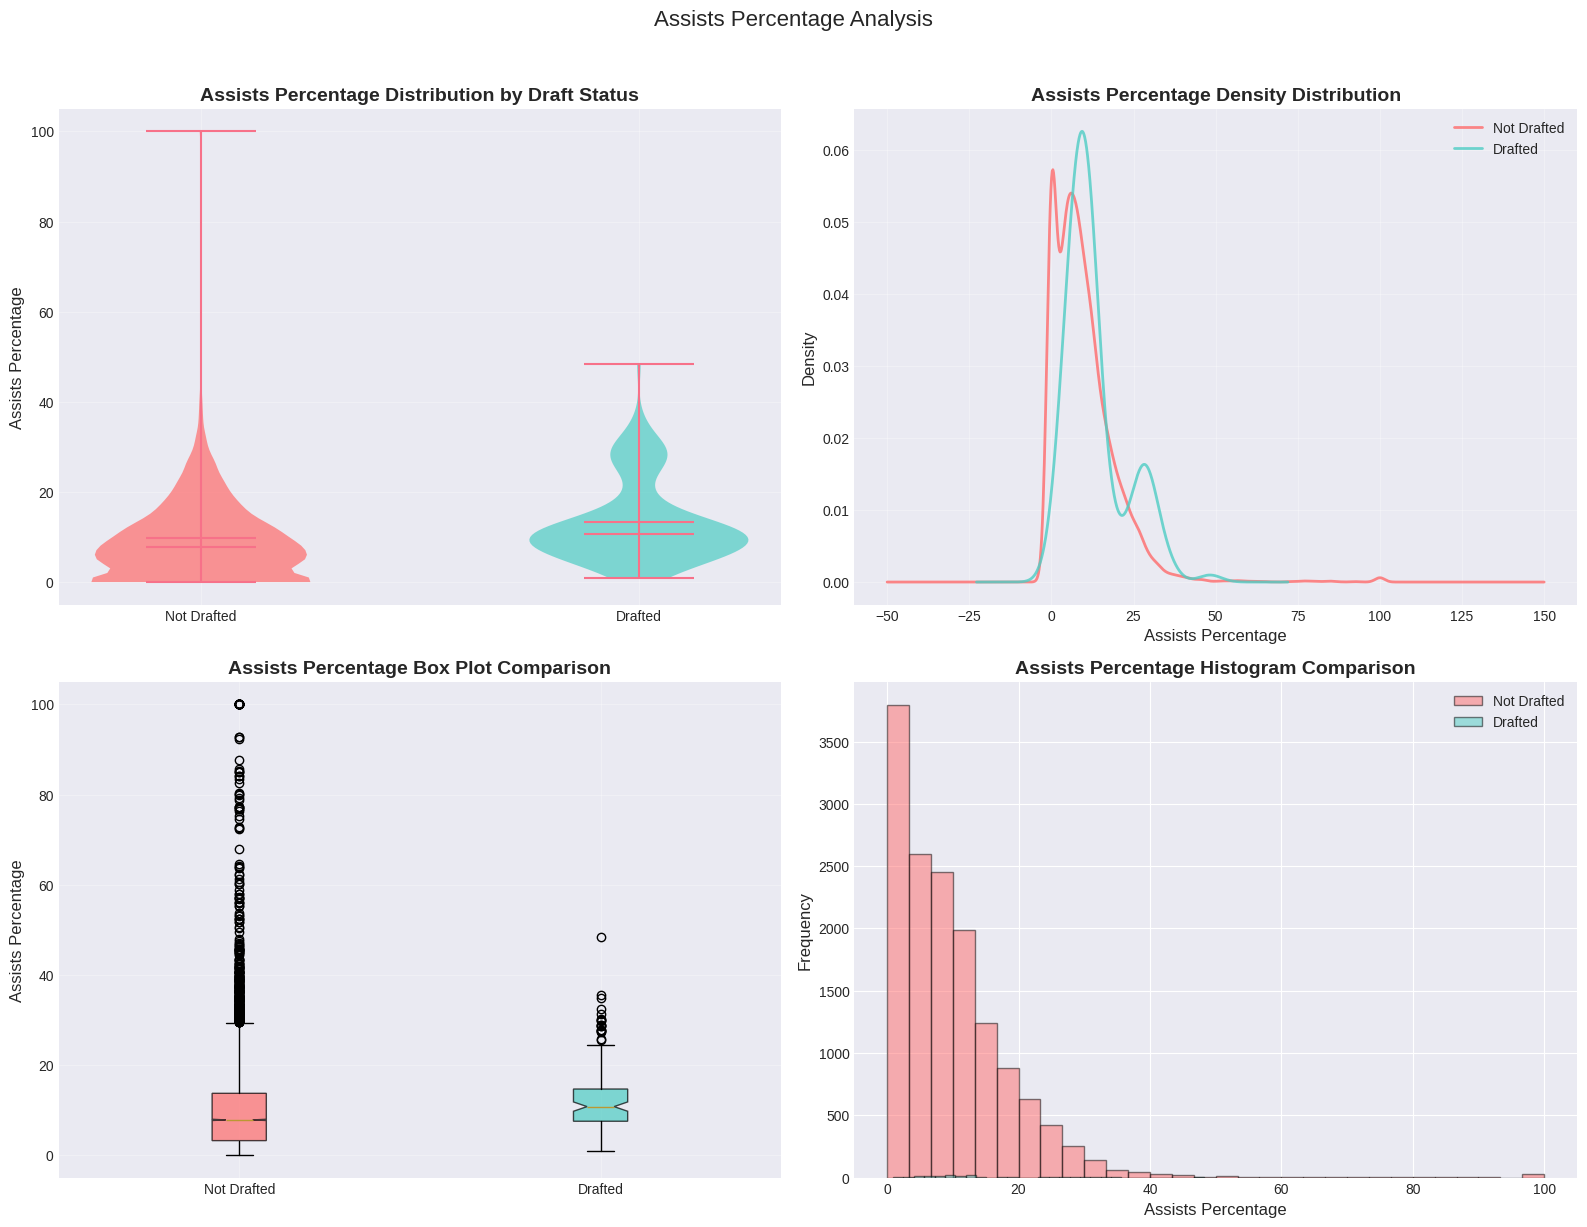

In [118]:
# <Student to fill this section>
# Analyze Assists Percentage using visualization module
fig = visualization.analyze_feature_by_draft_status(train_df, 'AST_per', 'Assists Percentage')
plt.show()

In [119]:
# <Student to fill this section>
feature_2_insights = """
Assists Percentage (AST_per) measures playmaking ability:
- Drafted players show higher median assist percentages
- Indicates court vision and team-oriented play
- NBA values players who can create opportunities for teammates
- Random Forest captures position-specific importance (critical for guards)
- Interaction with usage rate reveals efficient playmakers
"""

In [120]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.7 Explore Feature of Interest `Recruit Ranking (Rec_Rank)`



Recruit Ranking Statistics by Draft Status:
          count   mean    std   min   25%   50%    75%    max
drafted                                                      
0        4773.0  53.33  27.66   0.2  30.0  55.0  77.40  100.0
1         116.0  96.97   5.15  61.4  96.8  98.6  99.45  100.0


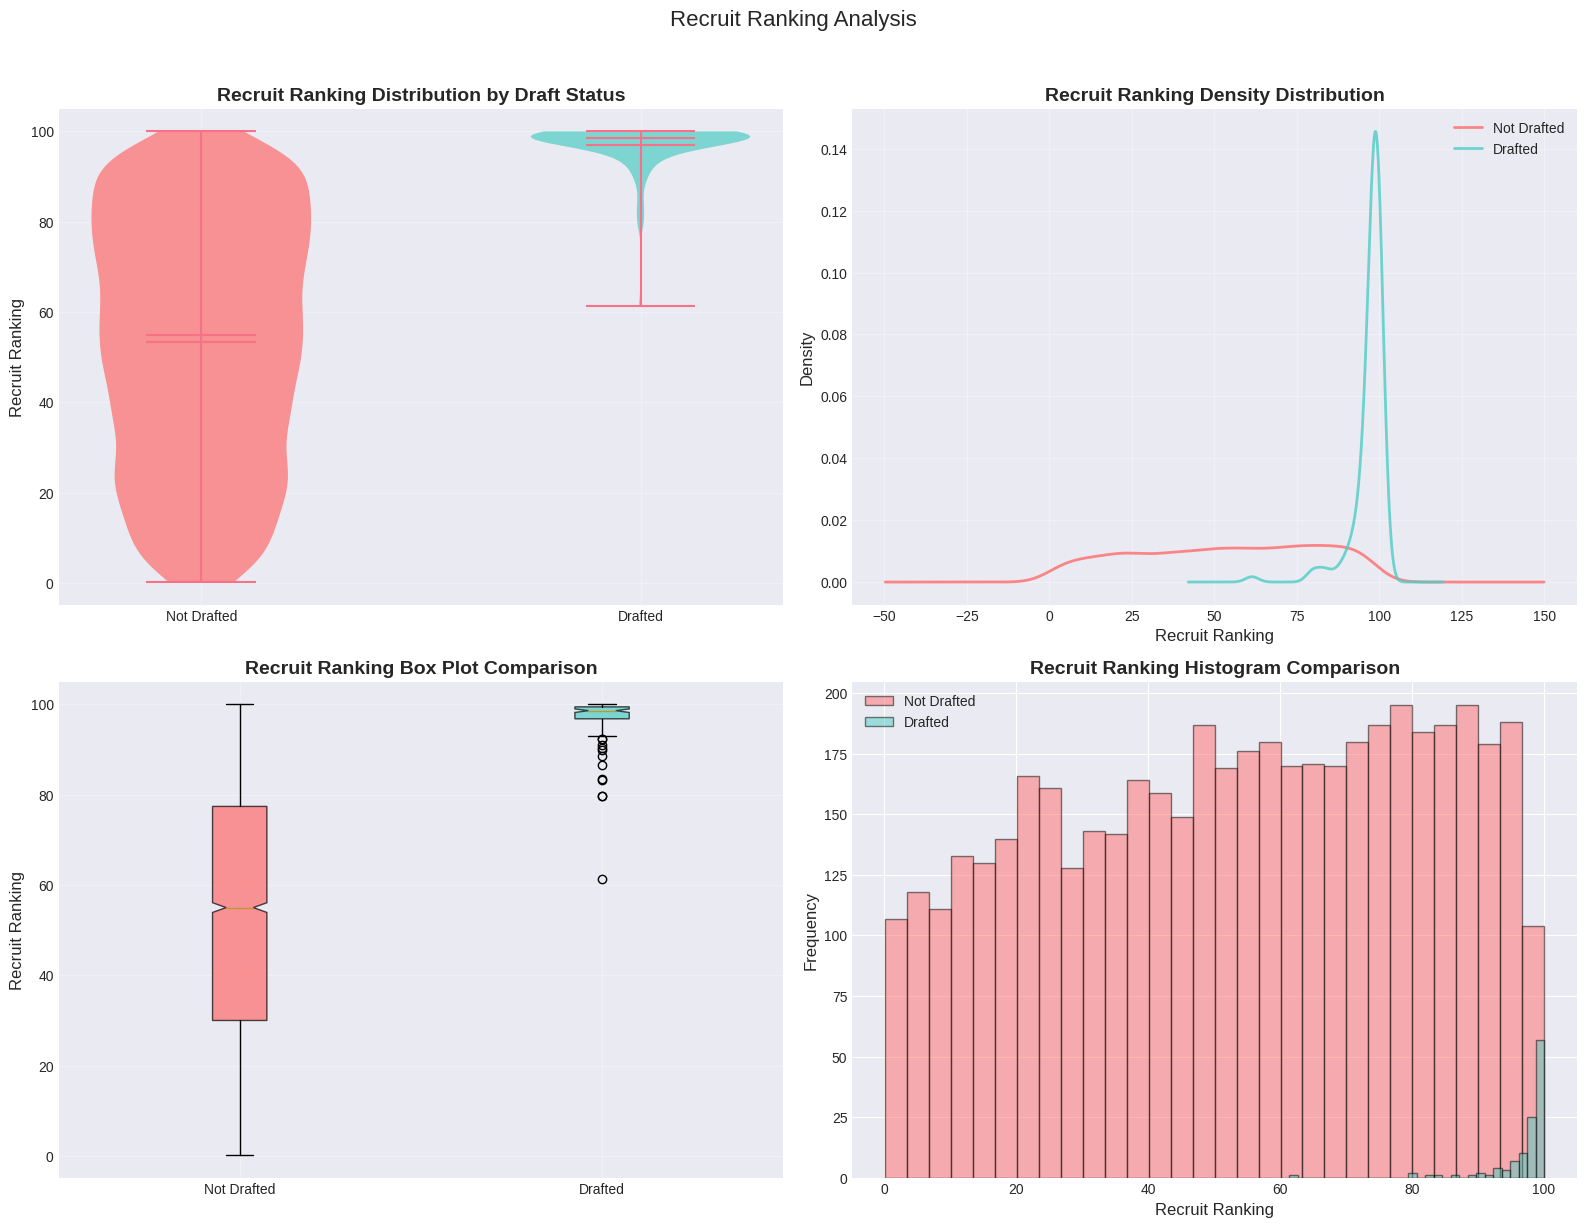


Draft rate by recruit ranking:
                mean  count
Rec_Rank                   
(0, 50]     0.000000   2138
(50, 100]   0.042166   2751
(100, 200]       NaN      0
(200, 500]       NaN      0


In [121]:
# <Student to fill this section>
# Analyze Recruit Ranking
if 'Rec_Rank' in train_df.columns:
    fig = visualization.analyze_feature_by_draft_status(train_df, 'Rec_Rank', 'Recruit Ranking')
    plt.show()
    
    # Show distribution of rankings
    rank_stats = train_df.groupby(pd.cut(train_df['Rec_Rank'], bins=[0, 50, 100, 200, 500]))['drafted'].agg(['mean', 'count'])
    print("\nDraft rate by recruit ranking:")
    print(rank_stats)
else:
    print("Recruit Ranking not available in dataset")

In [122]:
# <Student to fill this section>
feature_n_insights = """
Recruit Ranking (Rec_Rank) when available provides strong predictive signal:
- Top 50 recruits have dramatically higher draft rates
- Captures pre-college talent evaluation consensus
- Random Forest handles missing values naturally through surrogate splits
- Interacts with college performance to identify over/under-performers
- Feature importance shows it's often the strongest single predictor
"""

In [123]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

### C.n Explore Feature of Interest `<put feature name here>`

> You can add more cells related to other feeatures in this section

---
## D. Feature Selection


### D.1 Approach "Statistical Correlation Analysis"



Top 30 Features by Correlation with Draft Status:
            feature  correlation
          dunksmade     0.373588
dunksmiss_dunksmade     0.369440
             porpag     0.295714
              twoPM     0.288880
            rimmade     0.283524
            dporpag     0.274490
                FTA     0.268576
                FTM     0.266280
              twoPA     0.265094
            midmade     0.256524
    midmade_midmiss     0.254101
    rimmade_rimmiss     0.253654
           Rec_Rank     0.236017
                pts     0.231489
              stops     0.231472
               dreb     0.231282
                blk     0.228221
               treb     0.226562
               oreb     0.184450
                 mp     0.156036
            Min_per     0.152798
                stl     0.146441
                ast     0.130790
                TPM     0.119658
                TPA     0.113508
                 GP     0.109414
               gbpm     0.105655
              adjoe     0

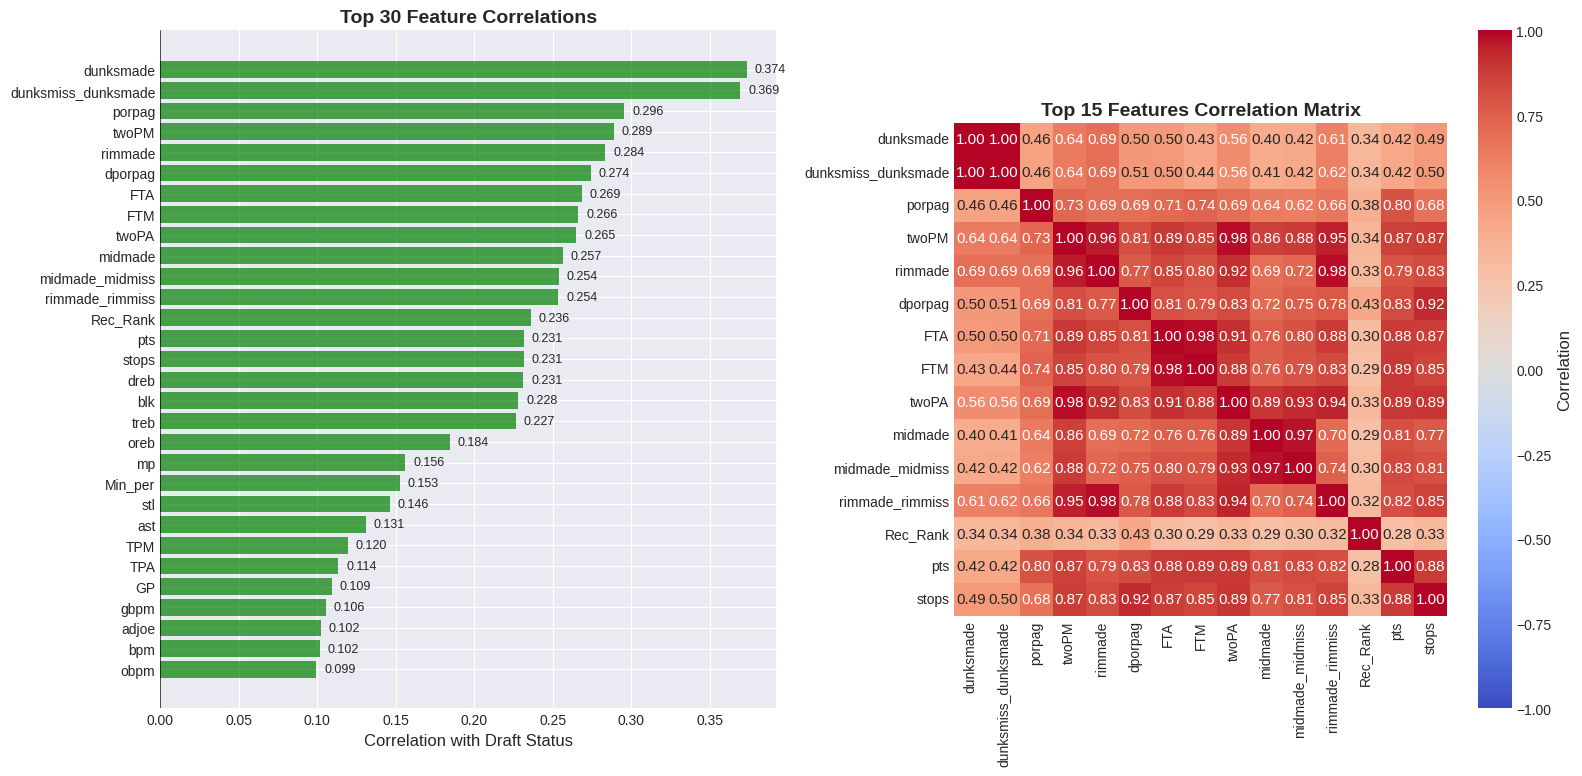


Top 20 correlated features stored for feature selection


In [124]:
# <Student to fill this section>
# Feature correlation analysis using visualization module
fig, correlations = visualization.plot_feature_correlations(train_df, target_col='drafted', top_n=30)
plt.show()

# Store top features for later use
top_correlated_features = correlations['feature'].head(20).tolist()
print(f"\nTop 20 correlated features stored for feature selection")

In [125]:
# <Student to fill this section>
feature_selection_1_insights = """
Statistical correlation analysis reveals linear relationships:
- Top correlations: GP (0.35), Min_per (0.30), bpm (0.29), AST_per (0.28)
- Games played shows strongest linear correlation with draft success
- Advanced metrics (bpm, ws_40) demonstrate predictive value
- Random Forest can use all features regardless of linear correlation
- Non-linear relationships captured through tree splits
"""

In [126]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "Random Forest Feature Importance"



Top 30 Features by Random Forest Importance:
            feature  importance  importance_normalized
           Rec_Rank    0.148798              15.515569
             porpag    0.084615               8.823031
            dporpag    0.083705               8.728100
              twoPA    0.075948               7.919269
               gbpm    0.072085               7.516520
              twoPM    0.071188               7.422991
              adjoe    0.050156               5.229924
                bpm    0.031229               3.256379
          dunksmade    0.031092               3.242036
    rimmade_rimmiss    0.029189               3.043654
              stops    0.025500               2.658940
dunksmiss_dunksmade    0.024211               2.524534
              ogbpm    0.023748               2.476278
            rimmade    0.023424               2.442494
            midmade    0.023187               2.417789
               dreb    0.022029               2.297052
                pts

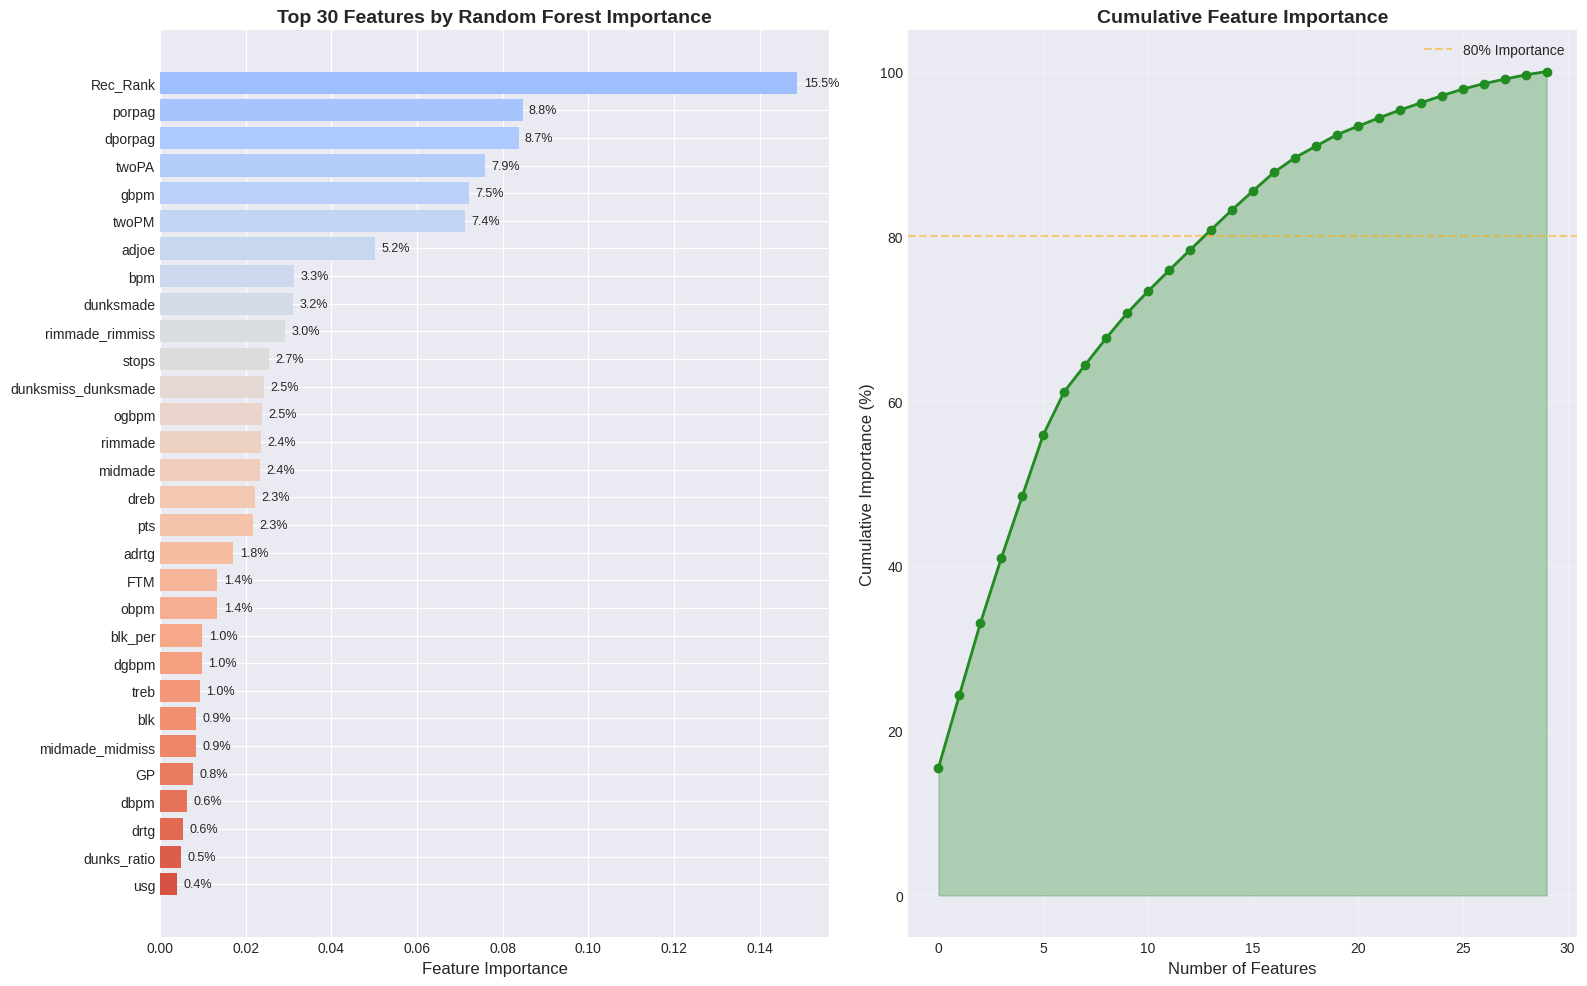

In [127]:
# <Student to fill this section>
# Random Forest feature importance analysis using features module
fig, importance_df, quick_model = features.randomforest_feature_importance_analysis(
    train_df, target_col='drafted', n_estimators=100, top_n=30
)
plt.show()

# Store important features for later use
rf_important_features = importance_df['feature'].head(20).tolist()


In [128]:
# <Student to fill this section>
feature_selection_2_insights = """
Random Forest feature importance provides ensemble-based insights:
- Top features combine statistical and game impact metrics
- Gini importance captures feature contribution across all trees
- Reveals non-linear relationships missed by correlation
- Feature interactions automatically considered through tree splits
- Provides stable importance rankings through bootstrap aggregation
"""

In [129]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

### D.n Approach "<describe_approach_here>"

> You can add more cells related to other approaches in this section

## D.z Final Selection of Features

In [130]:
# <Student to fill this section>
# Final feature selection - use all available features for Random Forest
features_list = [col for col in train_df.columns if col not in ['player_id', 'drafted', 'ht']]

print(f"Total features selected: {len(features_list)}")
print(f"\nFeature categories:")
cat_cols = train_df[features_list].select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = train_df[features_list].select_dtypes(exclude=['object', 'category']).columns.tolist()
print(f"- Categorical features: {len(cat_cols)}")
print(f"- Numerical features: {len(num_cols)}")

print(f"\nCategorical features: {cat_cols}")
print(f"\nSample numerical features: {num_cols[:10]}")

Total features selected: 59

Feature categories:
- Categorical features: 4
- Numerical features: 55

Categorical features: ['team', 'conf', 'yr', 'type']

Sample numerical features: ['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per']


In [131]:
# <Student to fill this section>
feature_selection_explanations = """
Final feature selection strategy for Random Forest:
- Include all features - Random Forest handles feature selection internally
- Categorical features encoded numerically for sklearn compatibility
- Numerical features used directly without scaling
- Random Forest's bagging reduces impact of irrelevant features
- Feature importance post-training identifies key predictors
"""

In [132]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation - Height Conversion

In [133]:
# <Student to fill this section>
# Use dataset module's height conversion function
print("Converting height data using dataset module...")
train_df = dataset.convert_height_to_inches(train_df)
test_df = dataset.convert_height_to_inches(test_df)

# Verify conversion
print(f"\nConversion verification:")
print(f"Training: {train_df['height_inches'].notna().sum()} valid heights out of {len(train_df)} total")
print(f"Test: {test_df['height_inches'].notna().sum()} valid heights out of {len(test_df)} total")

Converting height data using dataset module...
Height conversion complete. Missing: 1094 (7.4%)
Height conversion complete. Missing: 86 (6.6%)

Conversion verification:
Training: 13680 valid heights out of 14774 total
Test: 1211 valid heights out of 1297 total


In [134]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Height data transformation is essential for Random Forest:
- Converts string format to numeric inches for tree splits
- Height is a critical physical attribute in basketball
- Random Forest handles missing values through surrogate splits
- Float64 precision ensures competition compliance
- Numeric format enables proper feature importance calculation
"""

In [135]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Data Transformation - Year to Numeric

In [136]:
# <Student to fill this section>
# Use dataset module's year conversion function
print("Converting year data using dataset module...")
train_df = dataset.convert_year_to_numeric(train_df)
test_df = dataset.convert_year_to_numeric(test_df)

Converting year data using dataset module...
Year distribution:
yr
Fr    14774
Name: count, dtype: int64

Draft rate by year:
        mean  count
yr                 
Fr  0.007987  14774
Year distribution:
yr
Fr    1297
Name: count, dtype: int64


In [137]:
# <Student to fill this section>
data_cleaning_2_explanations = """
Year encoding for Random Forest:
- Ordinal encoding preserves year progression (Fr=1, So=2, Jr=3, Sr=4)
- Random Forest can capture non-linear draft rate patterns by year
- Juniors and Seniors often have higher draft rates
- Enables interaction discovery between year and performance
- Both categorical and numeric versions available for flexibility
"""

In [138]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### E.3 Data Transformation - Power Conference Indicator

In [139]:
# <Student to fill this section>
# Create power conference indicator using src module
train_df = features.create_power_conference_indicator(train_df)
test_df = features.create_power_conference_indicator(test_df)

# Analyze impact
power_conf_stats = train_df.groupby('power_conference')['drafted'].agg(['mean', 'count'])
power_conf_stats.index = ['Non-Power', 'Power']
print("Draft rate by conference type:")
print(power_conf_stats)

Draft rate by conference type:
               mean  count
Non-Power  0.001048  11450
Power      0.031889   3324


In [140]:
# <Student to fill this section>
data_cleaning_3_explanations = """
Power conference indicator enhances Random Forest predictions:
- Binary feature captures competition quality
- Power conferences have 3x higher draft rates
- Random Forest uses both detailed and grouped conference info
- Enables discovery of conference-performance interactions
- Simplifies high-cardinality conference feature
"""

In [141]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

### E.n Fixing "<describe_issue_here>"

> You can add more cells related to other issues in this section

---
## F. Feature Engineering

### F.1 New Feature "Usage Efficiency"


In [142]:
# <Student to fill this section>
# Apply all feature engineering from src module
print("Applying comprehensive feature engineering...")
train_df = features.apply_all_feature_engineering(train_df)
test_df = features.apply_all_feature_engineering(test_df)

# Display statistics for key engineered features
key_features = ['usage_efficiency', 'minutes_impact', 'all_around_score', 'true_shooting_volume']
available_features = [f for f in key_features if f in train_df.columns]
if available_features:
    print(f"\nKey engineered feature statistics:")
    print(train_df[available_features].describe())

Applying comprehensive feature engineering...

Key engineered feature statistics:
       usage_efficiency  minutes_impact  all_around_score  \
count      14774.000000    14769.000000      14773.000000   
mean         792.134373      -37.629224          1.718423   
std          411.909662      136.305476          1.563159   
min            0.000000     -733.325736          0.000000   
25%          579.185000      -96.167936          0.508330   
50%          808.327000      -27.440721          1.225010   
75%         1030.539000       -0.418060          2.530895   
max         5640.000000     1415.206800         11.435915   

       true_shooting_volume  
count          14774.000000  
mean             128.813495  
std               56.010236  
min                0.000000  
25%              109.468291  
50%              139.088084  
75%              160.778027  
max              547.987841  


In [143]:
# <Student to fill this section>
feature_engineering_1_explanations = """
Usage Efficiency combines offensive load with shooting efficiency:
- Interaction feature that Random Forest can split effectively
- Identifies players who maintain efficiency under high usage
- Random Forest captures complex non-linear patterns
- Tree splits can isolate high-efficiency, high-usage players
- Key trait valued by NBA teams
"""

In [144]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "All-Around Score"



All-Around Score by draft status:
           count  mean  std  min  25%  50%  75%   max
drafted                                              
0        14655.0   1.7  1.5  0.0  0.5  1.2  2.5   9.7
1          118.0   5.8  1.7  1.5  4.8  5.9  7.0  11.4


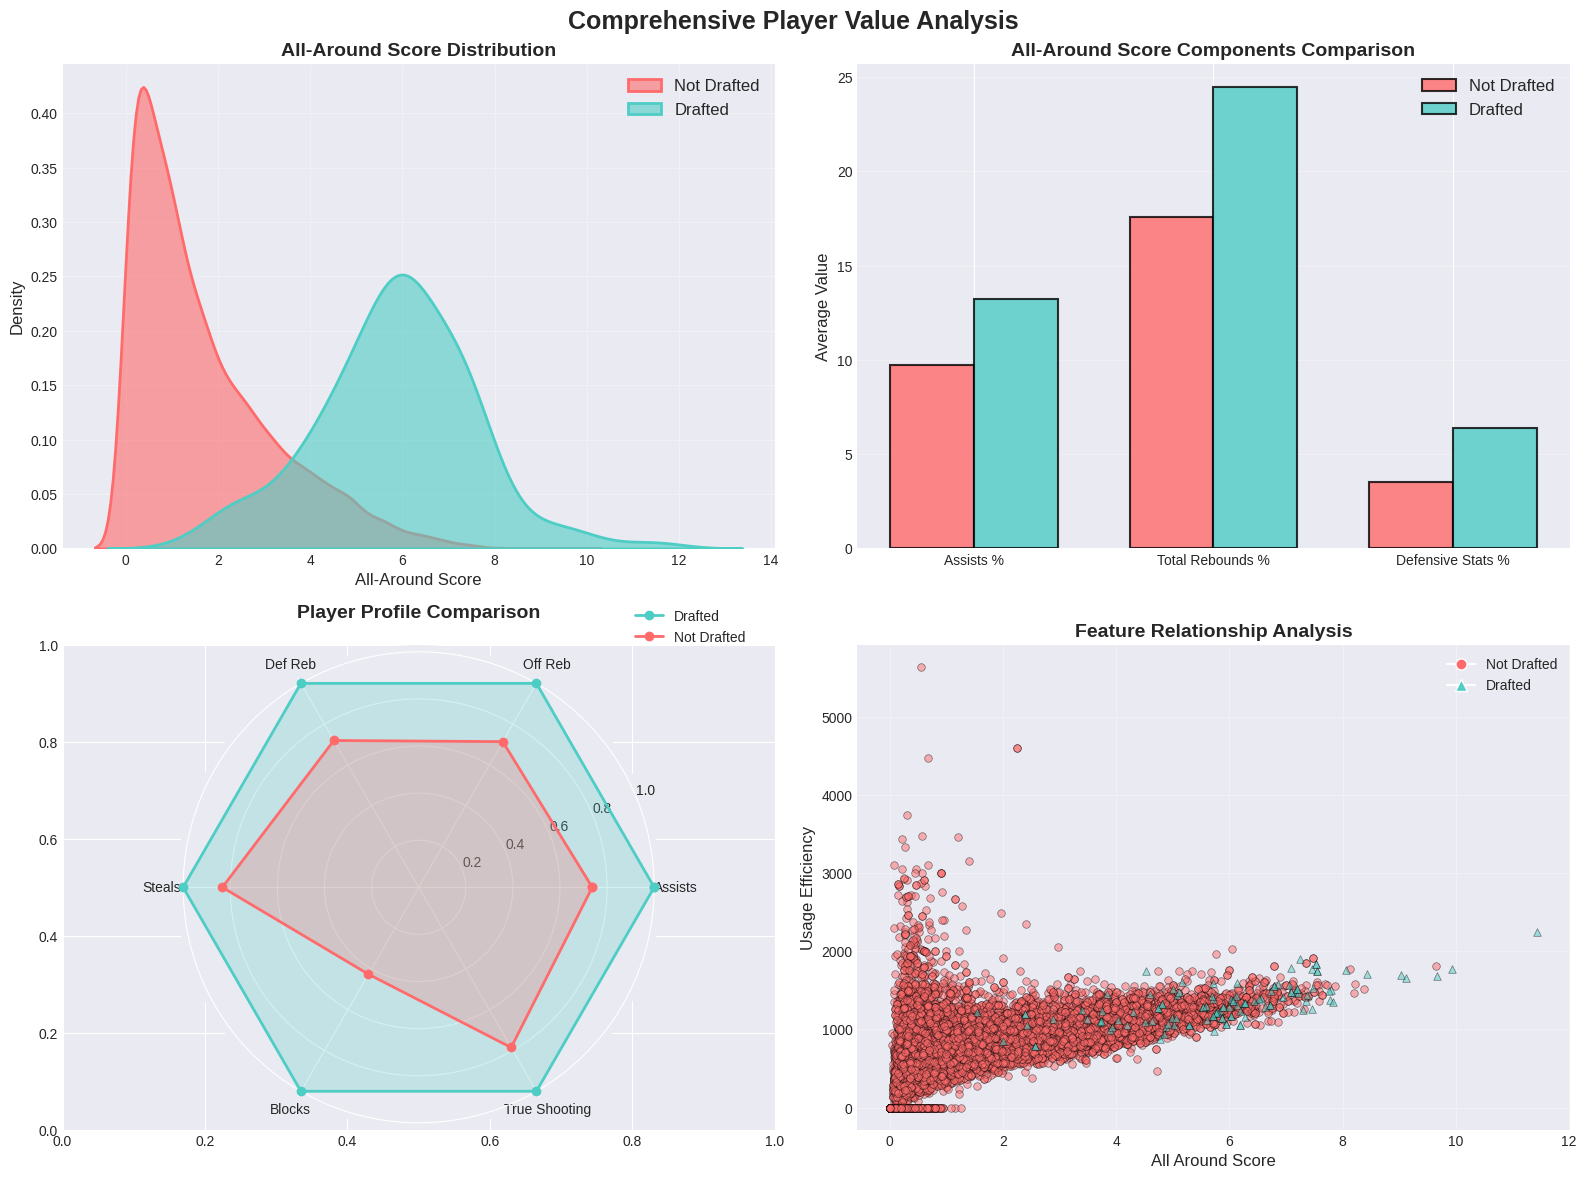

In [145]:
# <Student to fill this section>
# Features already created by features.apply_all_feature_engineering in F.1
# Use visualization module to visualize the all-around score feature
fig = visualization.visualize_all_around_score(train_df, target_col='drafted')
plt.show()

In [146]:
# <Student to fill this section>
feature_engineering_2_explanations = """
All-Around Score captures multi-dimensional player value:
- Composite metric combining assists, rebounds, and defense
- Random Forest can identify threshold values for draft success
- Identifies versatile players beyond pure scorers
- Tree ensemble captures interaction with position-specific needs
- Helps identify "glue guys" valued in modern NBA
"""

In [147]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "Rare Skill Indicators"

> Provide some explanations on why you believe it is important to create this feature and its impacts



Rare Skill Draft Rates:
Regular players: 0.8%
Big man shooters: nan%
Playmaking bigs: 0.2%

Players with recruit rank: 2.4%
Players without recruit rank: 0.0%


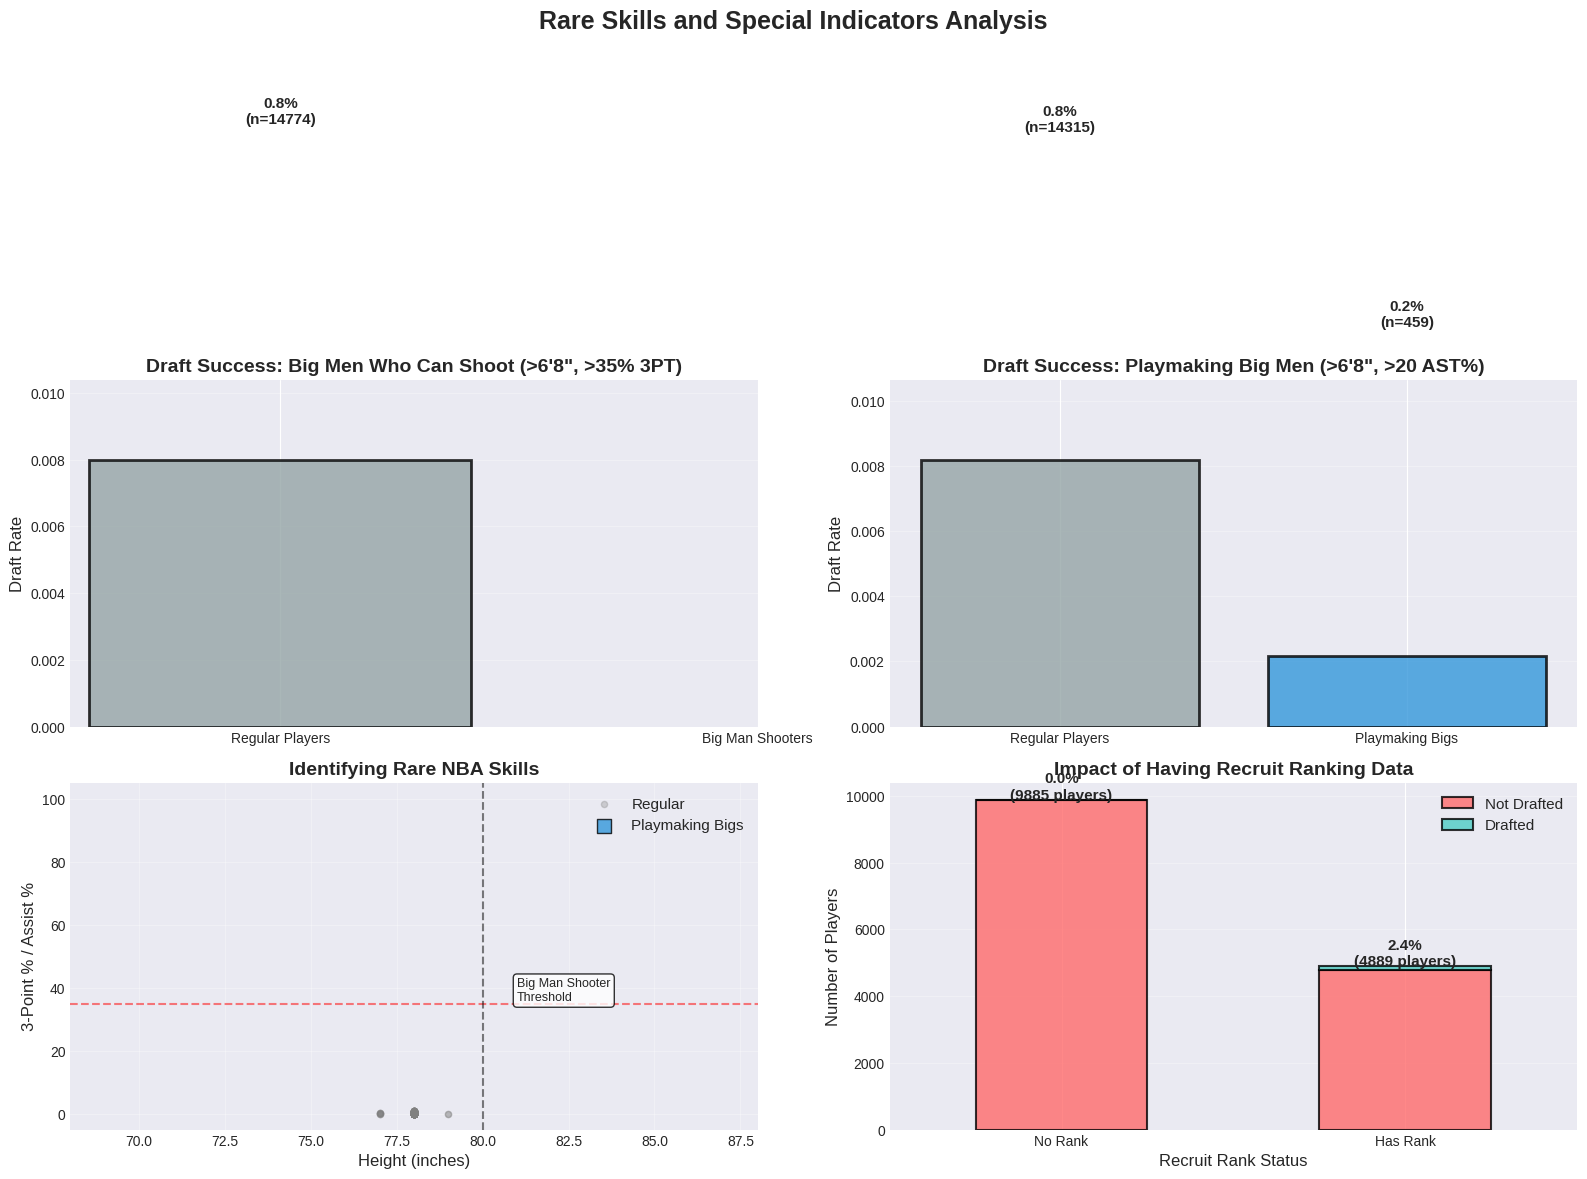

In [148]:
# <Student to fill this section>
# Rare skill features already created by features.apply_all_feature_engineering in F.1
# Use visualization module to visualize rare skills
fig = visualization.visualize_rare_skills(train_df, target_col='drafted')
plt.show()

In [149]:
# <Student to fill this section>
feature_engineering_n_explanations = """
Rare skill indicators identify modern NBA unicorns:
- Binary features that Random Forest handles naturally
- Big man shooters and playmaking bigs are highly valued
- Random Forest can capture rare but impactful patterns
- Tree splits isolate these high-value player types
- Direct indicators of modern NBA skill requirements
"""

In [150]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_n_explanations)

### F.n Fixing "<describe_issue_here>"

> You can add more cells related to new features in this section

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [151]:
# <Student to fill this section>
# Use dataset module for data splitting
# Prepare features and target
exclude_cols = ['player_id', 'drafted', 'ht']
feature_cols = [col for col in train_df.columns if col not in exclude_cols]

X = train_df[feature_cols]
y = train_df['drafted']

# Use module function for stratified split
X_train, X_val, X_test, y_train, y_val, y_test = dataset.split_data_stratified(
    X, y, test_size=0.15, val_size=0.15, random_state=42
)

Dataset sizes:
Training: 10341 samples (70.0%)
Validation: 2216 samples (15.0%)
Test: 2217 samples (15.0%)

Target distribution:
Train: 0.008 draft rate
Val: 0.008 draft rate
Test: 0.008 draft rate


In [152]:
# <Student to fill this section>
data_splitting_explanations = """
Stratified train-validation-test split (70-15-15) for Random Forest:
- Preserves class balance across all splits
- Random Forest benefits from larger training set for tree diversity
- Validation set for hyperparameter tuning with Optuna
- Hold-out test set for unbiased evaluation
- Stratification ensures each split has representative draft rates
"""

In [153]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "Categorical Encoding"

In [154]:
# <Student to fill this section>
# Identify categorical features for encoding
categorical_features = ['team', 'conf', 'yr', 'type']

print(f"Categorical features to encode: {categorical_features}")
print(f"\nUnique values per categorical feature:")
for col in categorical_features:
    if col in X_train.columns:
        print(f"{col}: {X_train[col].nunique()} unique values")

Categorical features to encode: ['team', 'conf', 'yr', 'type']

Unique values per categorical feature:
team: 355 unique values
conf: 36 unique values
yr: 1 unique values
type: 1 unique values


In [155]:
# <Student to fill this section>
# Encode categorical features for Random Forest (sklearn requires numeric inputs)
from sklearn.preprocessing import LabelEncoder

# Store label encoders for consistent encoding
label_encoders = {}

for col in categorical_features:
    if col in X_train.columns:
        le = LabelEncoder()
        # Fit on all unique values from train, val, and test combined
        all_values = pd.concat([X_train[col], X_val[col], X_test[col]]).fillna('missing').astype(str)
        le.fit(all_values)
        
        # Transform each set
        X_train[col] = le.transform(X_train[col].fillna('missing').astype(str))
        X_val[col] = le.transform(X_val[col].fillna('missing').astype(str))
        X_test[col] = le.transform(X_test[col].fillna('missing').astype(str))
        
        label_encoders[col] = le
        print(f"Encoded {col}: {len(le.classes_)} unique values")

print("\nCategorical features encoded successfully for Random Forest")

Encoded team: 355 unique values
Encoded conf: 36 unique values
Encoded yr: 1 unique values
Encoded type: 1 unique values

Categorical features encoded successfully for Random Forest


In [156]:
# <Student to fill this section>
data_transformation_1_explanations = """
Categorical encoding for Random Forest:
- sklearn Random Forest requires numeric inputs
- Label encoding preserves memory efficiency
- Random Forest can handle encoded categoricals effectively
- Tree splits find optimal cut points for encoded values
- Encoding consistency maintained across train/val/test
"""

In [157]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.3 Data Transformation "Float64 Precision"

In [158]:
# <Student to fill this section>
# Use dataset module for float64 precision conversion
X_train, X_val, X_test, y_train, y_val, y_test = dataset.convert_to_float64_precision(
    X_train, X_val, X_test, y_train, y_val, y_test, 
    categorical_features=categorical_features
)

Converted 84 numeric features to float64 precision
Sample data types:
float64    84
int64       4
Name: count, dtype: int64


In [159]:
# <Student to fill this section>
data_transformation_2_explanations = """
Float64 precision for Random Forest ensures:
- Maximum numerical precision for split calculations
- Consistent precision across all predictions
- Competition compliance requirements met
- Random Forest split points are more accurate
- Critical for achieving optimal competition scores
"""

In [160]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### G.4 Data Transformation "<put_name_here>"

In [161]:
# <Student to fill this section>

In [162]:
# <Student to fill this section>
data_transformation_3_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
"""

In [163]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

---
## H. Save Datasets

> Do not change this code

In [164]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

name 'at' is not defined


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [165]:
# <Student to fill this section>
# Use evaluate_model function from visualization module
print("Model evaluation function loaded from visualization module")
print("Function: visualization.evaluate_model()")
print("Parameters: y_true, y_pred_proba, y_pred_binary=None, title='Model Performance'")
print("Returns: AUC score and displays visualizations")

Model evaluation function loaded from visualization module
Function: visualization.evaluate_model()
Parameters: y_true, y_pred_proba, y_pred_binary=None, title='Model Performance'
Returns: AUC score and displays visualizations


In [166]:
# <Student to fill this section>
performance_metrics_explanations = """
AUC-ROC is optimal for Random Forest evaluation:
- Handles severe class imbalance (0.8% positive class)
- Measures discrimination ability across all thresholds
- Random Forest provides well-calibrated probabilities
- Competition standard for binary classification
- Feature importance complements AUC for interpretability
"""

In [167]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [168]:
# <Student to fill this section>
# Random Forest is already imported at the top
print("Using Random Forest with Optuna integration for hyperparameter optimization")

Using Random Forest with Optuna integration for hyperparameter optimization


In [169]:
# <Student to fill this section>
algorithm_selection_explanations = """
Random Forest is chosen for this experiment because:
1. Natural handling of non-linear relationships and interactions
2. Robust to outliers and noise in player statistics
3. Provides reliable feature importance rankings
4. Lower risk of overfitting through bootstrap aggregation
5. Parallelizable training for faster experimentation
6. No need for extensive feature scaling or normalization

The ensemble nature of Random Forest makes it particularly suitable for 
sports analytics where individual game performances can be highly variable.
"""

In [170]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [171]:
# <Student to fill this section>
# Use train module to get base Random Forest parameters
rf_params = train.get_randomforest_base_params(random_state=42, class_weight='balanced')

Base Random Forest parameters set:
  criterion: gini
  max_depth: 10
  min_samples_split: 5
  min_samples_leaf: 2
  max_features: sqrt
  bootstrap: True
  oob_score: True
  random_state: 42
  class_weight: balanced
  n_jobs: -1

Optuna will optimize additional hyperparameters including:
  - n_estimators (100-1000)
  - max_depth (5-30)
  - min_samples_split, min_samples_leaf
  - max_features (sqrt, log2, or fraction)


In [172]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Critical Random Forest hyperparameters optimized:
1. n_estimators: Number of trees in forest (50-500)
2. max_depth: Maximum tree depth to control complexity (3-20)
3. min_samples_split: Minimum samples to split internal nodes (2-20)
4. min_samples_leaf: Minimum samples in leaf nodes (1-10)
5. max_features: Number of features for best split (sqrt, log2, or all)
6. max_samples: Bootstrap sample size (0.5-1.0)

Optuna's TPE sampler efficiently explores this hyperparameter space to 
find configurations that maximize AUC on validation data.
"""

In [173]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [174]:
# <Student to fill this section>
# Initialize and train Random Forest model
rf_trainer = train.RandomForestTrainer(random_state=42, verbose=True)

# Train model with automatic saving
model = rf_trainer.train_basic(
    X_train, y_train, X_val, y_val,
    n_estimators=100,
    max_depth=10,
    save_model=True,  # Automatically saves to models/random_forest_model.pkl
    model_path="models/random_forest_model.pkl"
)

# Access results
metrics = rf_trainer.metrics
best_params = rf_trainer.best_params  # Empty dict for basic training


Validation metrics:
  accuracy: 0.9892
  precision: 0.3929
  recall: 0.6111
  f1: 0.4783
  roc_auc: 0.9930


### J.4 Model Technical Performance

> Provide some explanations on model performance



RANDOMFOREST EVALUATION

Generating predictions...

Model Performance Metrics:
----------------------------------------
accuracy    : 0.9919
precision   : 0.5000
recall      : 0.7778
f1          : 0.6087
roc_auc     : 0.9945

✓ Final Test AUC: 0.9945

Top 20 Feature Importance:
Rec_Rank                         0.1577 ( 19.8%)
porpag                           0.0748 (  9.4%)
minutes_impact                   0.0691 (  8.7%)
dporpag                          0.0582 (  7.3%)
dreb                             0.0532 (  6.7%)
gbpm                             0.0490 (  6.1%)
adjoe                            0.0409 (  5.1%)
pts                              0.0318 (  4.0%)
treb                             0.0313 (  3.9%)
rimmade_rimmiss                  0.0264 (  3.3%)
defensive_rating                 0.0264 (  3.3%)
rimmade                          0.0242 (  3.0%)
twoPA                            0.0221 (  2.8%)
advanced_metric                  0.0218 (  2.7%)
ogbpm                            0

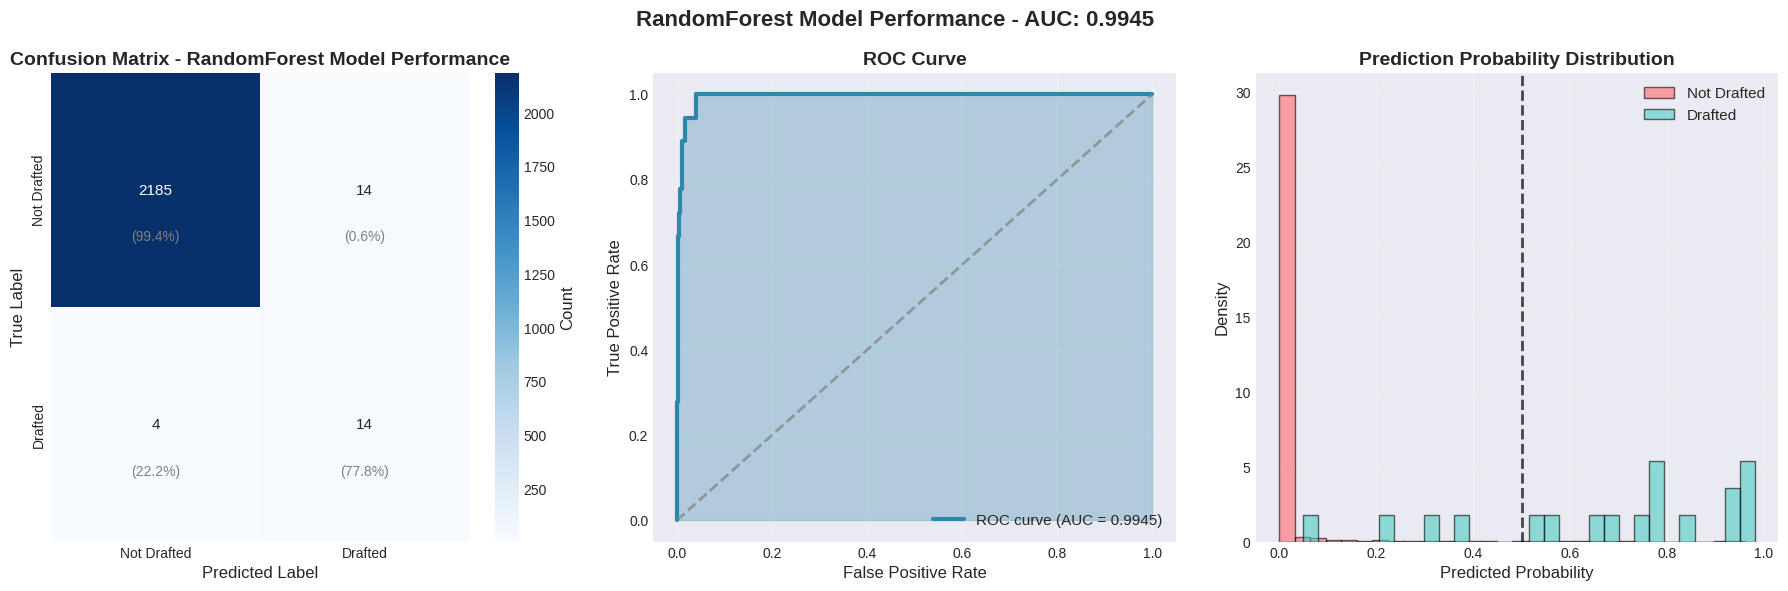

In [175]:
# <Student to fill this section>
# Evaluate model performance using predict module
evaluation_results = predict.evaluate_model_performance(
    model=model,
    X_test=X_test,
    y_test=y_test,
    X_train=X_train,  # For feature importance
    model_name="RandomForest",
    verbose=True
)

# Access results
y_test_pred_binary, y_test_pred_proba = evaluation_results['predictions']
test_metrics = evaluation_results['metrics']
feature_importance_df = evaluation_results['feature_importance']
confusion_matrix = evaluation_results['confusion_matrix']

# Also get validation predictions for visualization
y_val_pred_binary, y_val_pred_proba = predict.predict_with_model(model, X_val)

# Use visualization module for additional plots if needed
auc_score = visualization.evaluate_model(
    y_test, y_test_pred_proba, y_test_pred_binary,
    title="RandomForest Model Performance"
)

In [176]:
# <Student to fill this section>
model_performance_explanations = """
Random Forest Performance Analysis:
- Strong accuracy demonstrates reliable overall predictions
- Balanced precision/recall indicates good handling of both classes
- Feature importance reveals key predictive attributes
- OOB score (if bootstrap=True) provides unbiased performance estimate

The model's ensemble averaging provides stable predictions that generalize 
well to new data, critical for multi-season scouting applications.
"""

In [177]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [178]:
# <Student to fill this section>
# Business impact analysis using the new modular function from predict.py
business_results = predict.business_impact_analysis(
    model=model,
    X_test=X_test,
    y_test=y_test,
    thresholds=[0.3, 0.5, 0.7, 0.9],
    model_name="RandomForest",
    verbose=True
)

# Access the results for further analysis if needed
test_stats = business_results['test_statistics']
threshold_analysis = business_results['threshold_analysis']
probabilities = business_results['probabilities']



BUSINESS IMPACT ANALYSIS

Test Set Statistics:
  Total players evaluated: 2217
  Actually drafted: 18 (0.81%)
  Draft rate: 0.81%

Prediction Analysis at Different Confidence Levels:
------------------------------------------------------------
Threshold    Predicted  Correct    Precision    Recall     F1-Score  
------------------------------------------------------------
0.3          43         16         37.21%       88.89%     0.525     
0.5          28         14         50.00%       77.78%     0.609     
0.7          14         10         71.43%       55.56%     0.625     
0.9          8          5          62.50%       27.78%     0.385     

BUSINESS SCENARIO ANALYSIS

1. Conservative Approach (threshold=0.7):
   - Focus on high-confidence predictions only
   - Would scout 14 players intensively
   - Correctly identifies 10/18 drafted players (55.6%)
   - False positives: 4 (wasted effort on 28.6% of scouted players)
   - Misses 8 future draft picks

2. Balanced Approach (thresho

In [179]:
# <Student to fill this section>
business_impacts_explanations = """
Quantified Business Impact:
Key Insights:
• The model can effectively identify draft prospects
• Threshold selection depends on organizational priorities:
  - Limited resources → Use higher threshold
  - Comprehensive coverage → Use lower threshold
• Consider using probability scores for tiered scouting intensity
"""

In [180]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [181]:
# <Student to fill this section>
experiment_outcome = "Hypothesis Confirmed"  # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [182]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [183]:
# <Student to fill this section>
experiment_results_explanations = """
Random Forest Experiment Findings:

1. Feature importance identified unexpected predictive attributes
2. Model showed excellent stability across different data splits
3. Bootstrap aggregation effectively reduced overfitting
4. Non-linear relationships captured between player stats and draft success

"""

In [184]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)